In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./../Docs/DATA/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns=['Signal', 'Density']

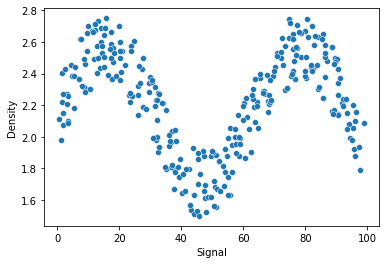

In [4]:
sns.scatterplot(
    x='Signal',
    y='Density',
    data=df
);

In [5]:
X=df['Signal'].values.reshape(-1, 1)
y=df['Density']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr_model=LinearRegression()

In [10]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
lr_preds=lr_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
mean_squared_error(lr_preds, y_test)

0.06605167265148641

In [14]:
mean_absolute_error(lr_preds, y_test)

0.211198973318633

In [15]:
signal_range=np.arange(0, 100)

In [16]:
signal_preds=lr_model.predict(signal_range.reshape((-1, 1)))

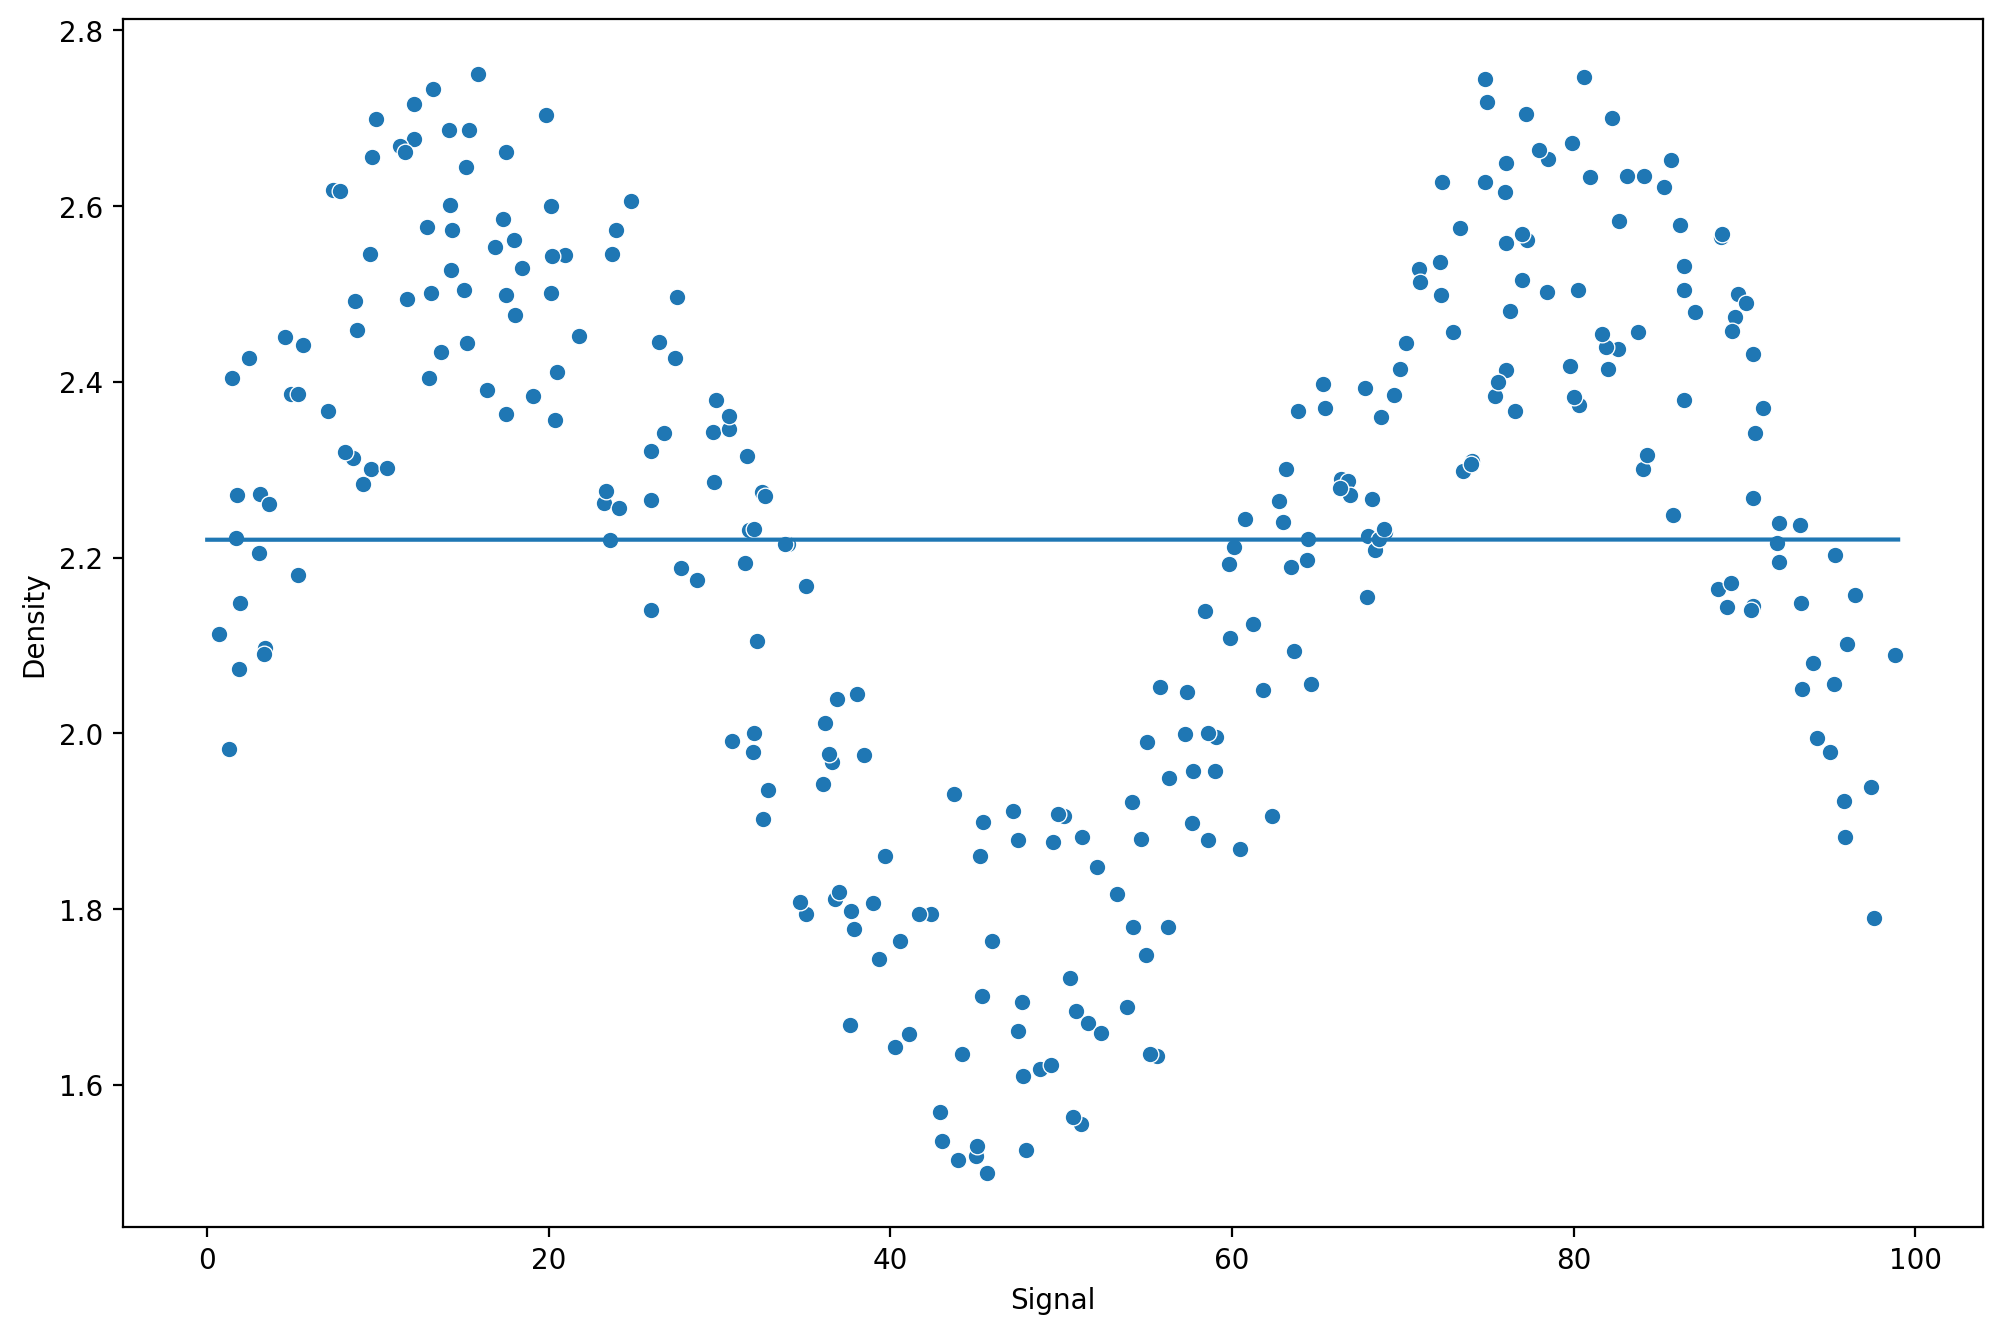

In [17]:
plt.figure(
    figsize=(12, 8),
    dpi=200
)

sns.scatterplot(
    x='Signal',
    y='Density',
    data=df
)

plt.plot(signal_range, signal_preds)

In [20]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit 
    model.fit(X_train, y_train)
    
    # Predictions
    preds=model.predict(X_test)
    
    rmse=np.sqrt(mean_squared_error(y_test, preds))
    mae=mean_absolute_error(y_test, preds)
    
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    signal_range=np.arange(0, 100)
    signal_preds=model.predict(signal_range.reshape(-1, 1))
    plt.figure(
        figsize=(12, 8),
        dpi=200
    )

    sns.scatterplot(
        x='Signal',
        y='Density',
        data=df
    )

    plt.plot(signal_range, signal_preds)
    

MAE : 0.211198973318633
RMSE : 0.25700519965846297


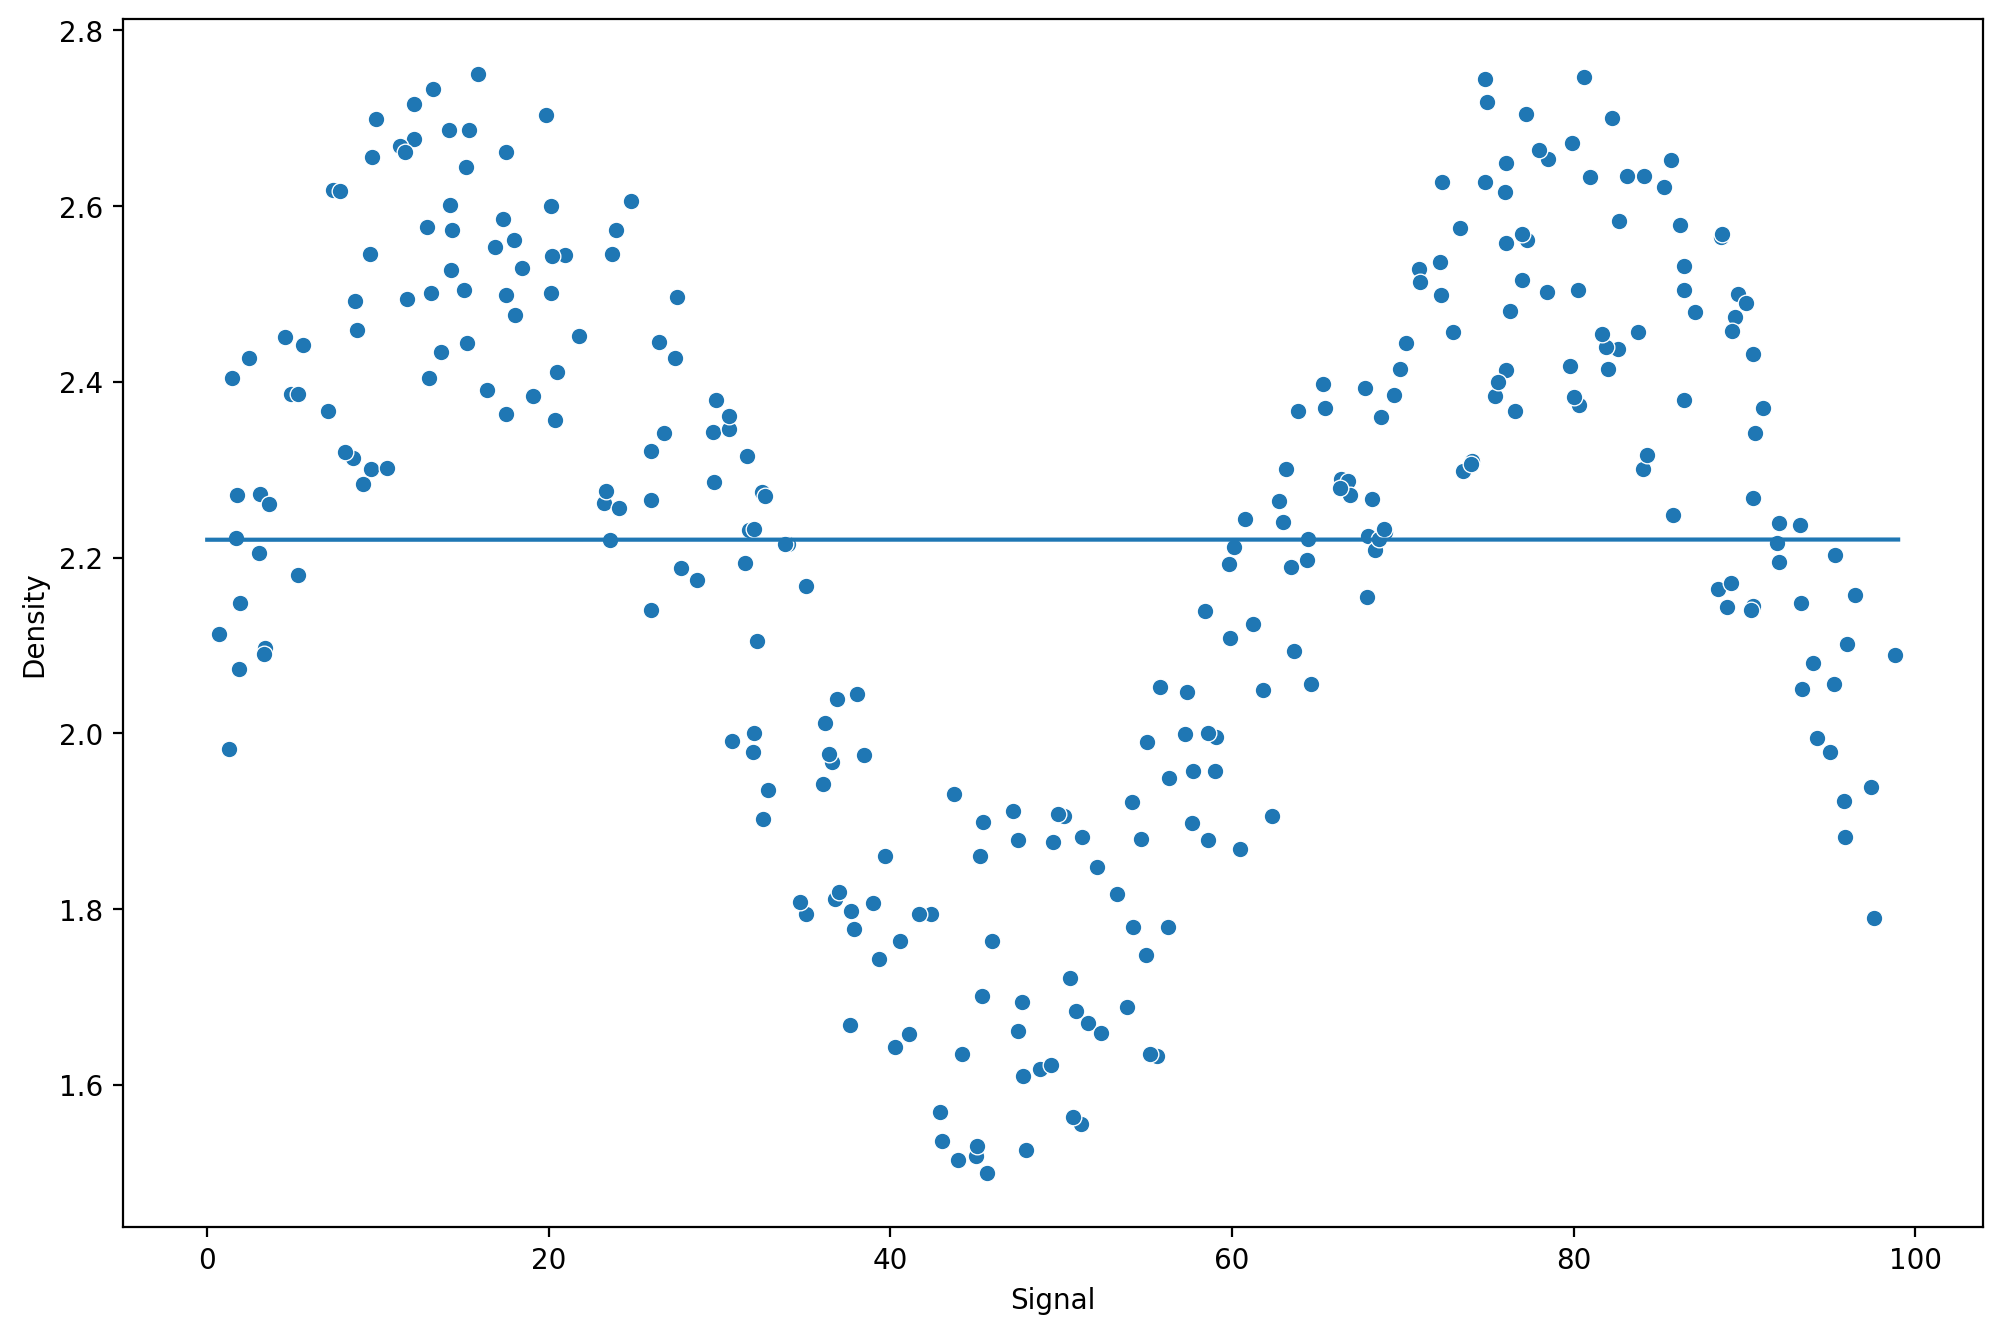

In [21]:
# Linear Regression

model=LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

MAE : 0.22903105443511287
RMSE : 0.28173095637255835


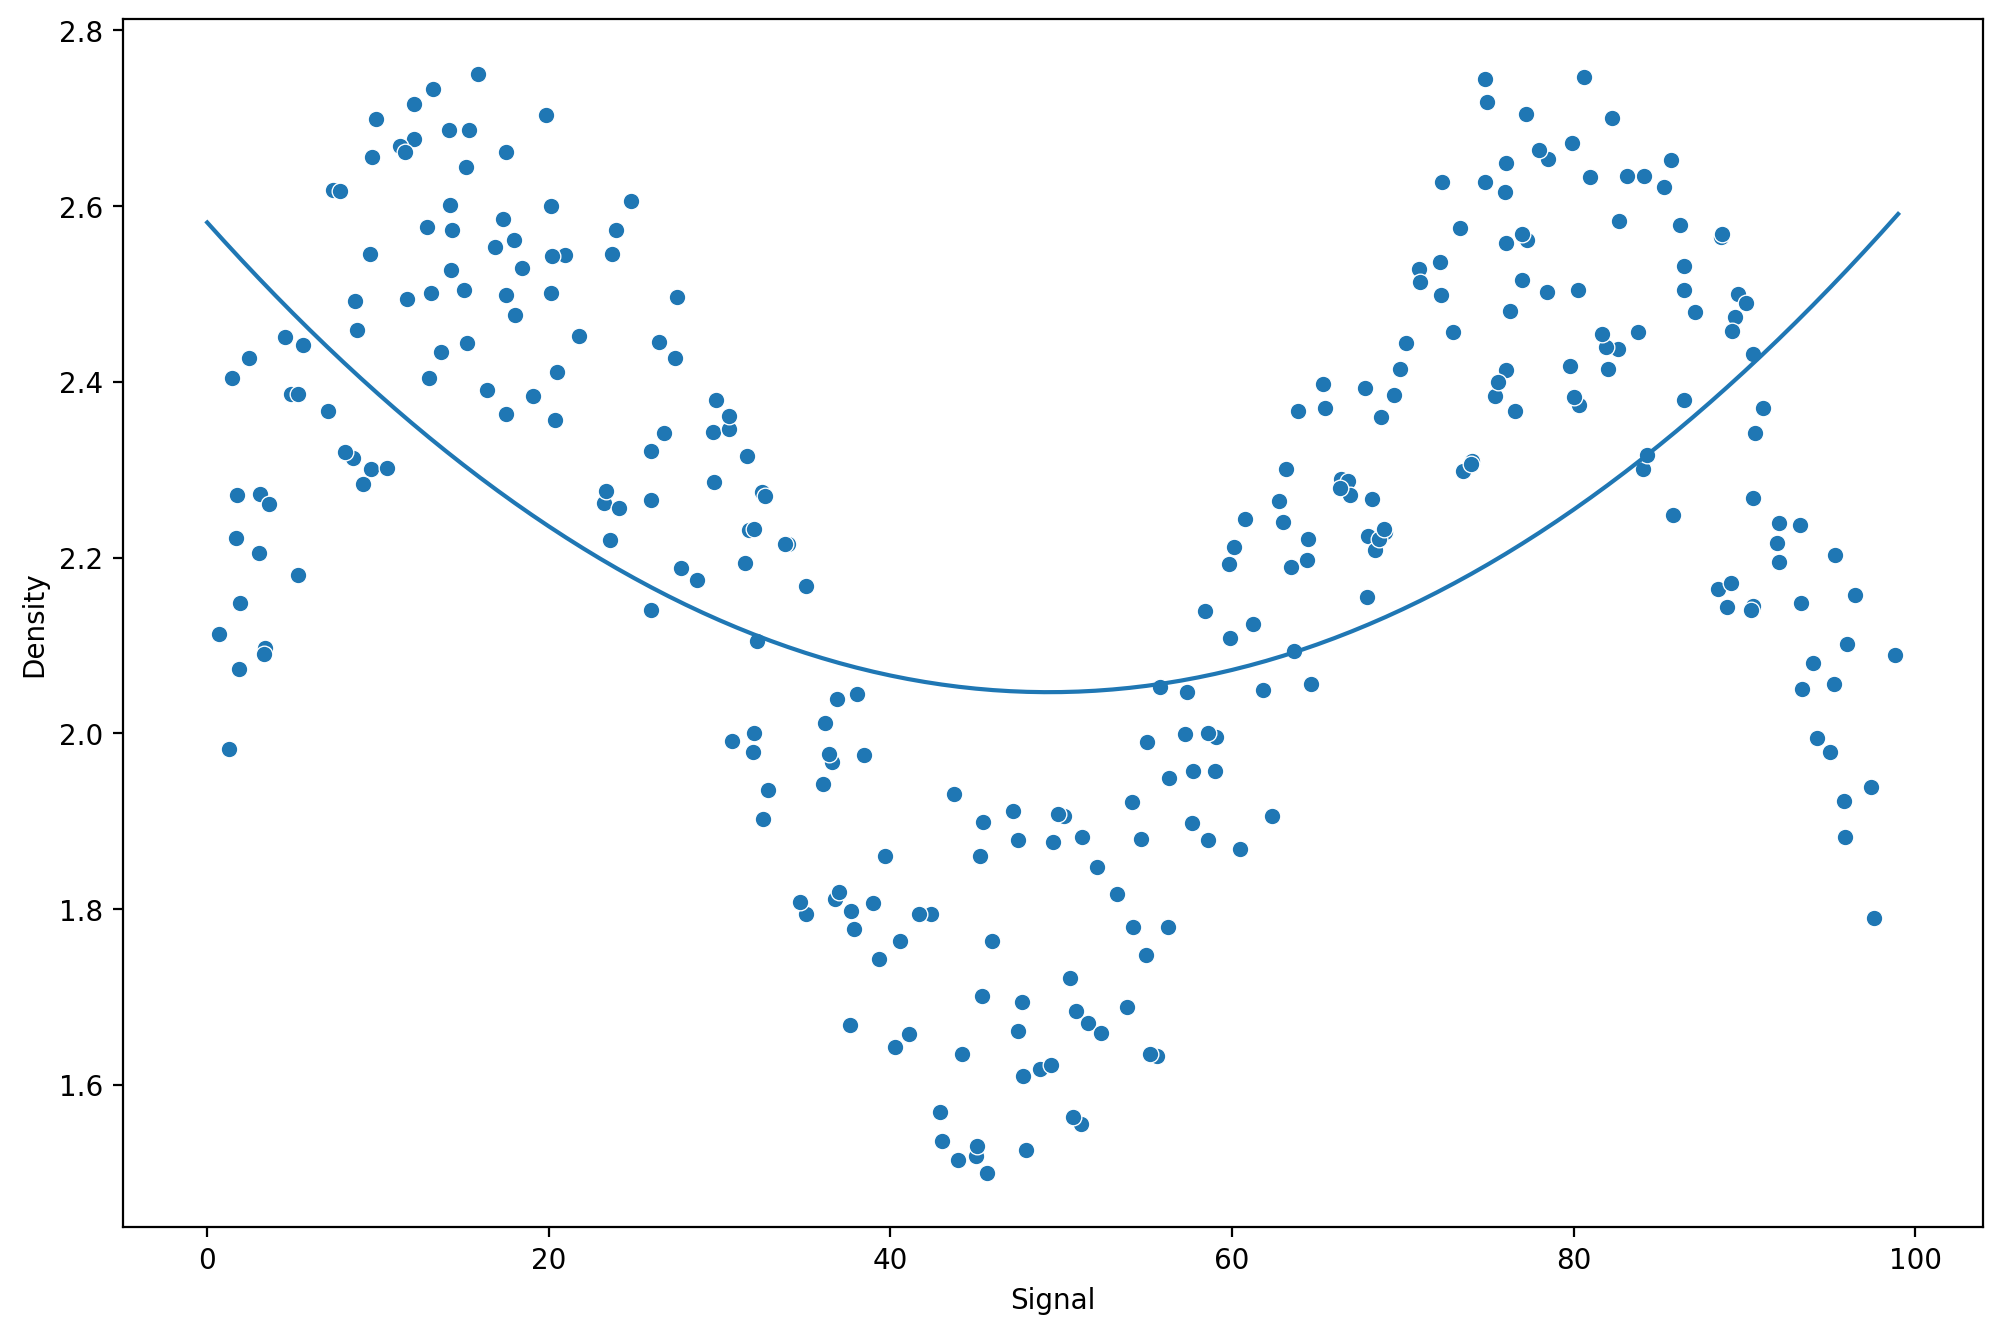

In [29]:
# Polynomial Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe_model=make_pipeline(
    PolynomialFeatures(degree=2), LinearRegression()
)

run_model(pipe_model, X_train, y_train, X_test, y_test)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442382
RMSE : 0.15234870286353372
MAE : 0.12198383614100564
RMSE : 0.13730685016923655
MAE : 0.11635971693292672
RMSE : 0.13277855732740926
MAE : 0.13363165935705315
RMSE : 0.15954234753677107


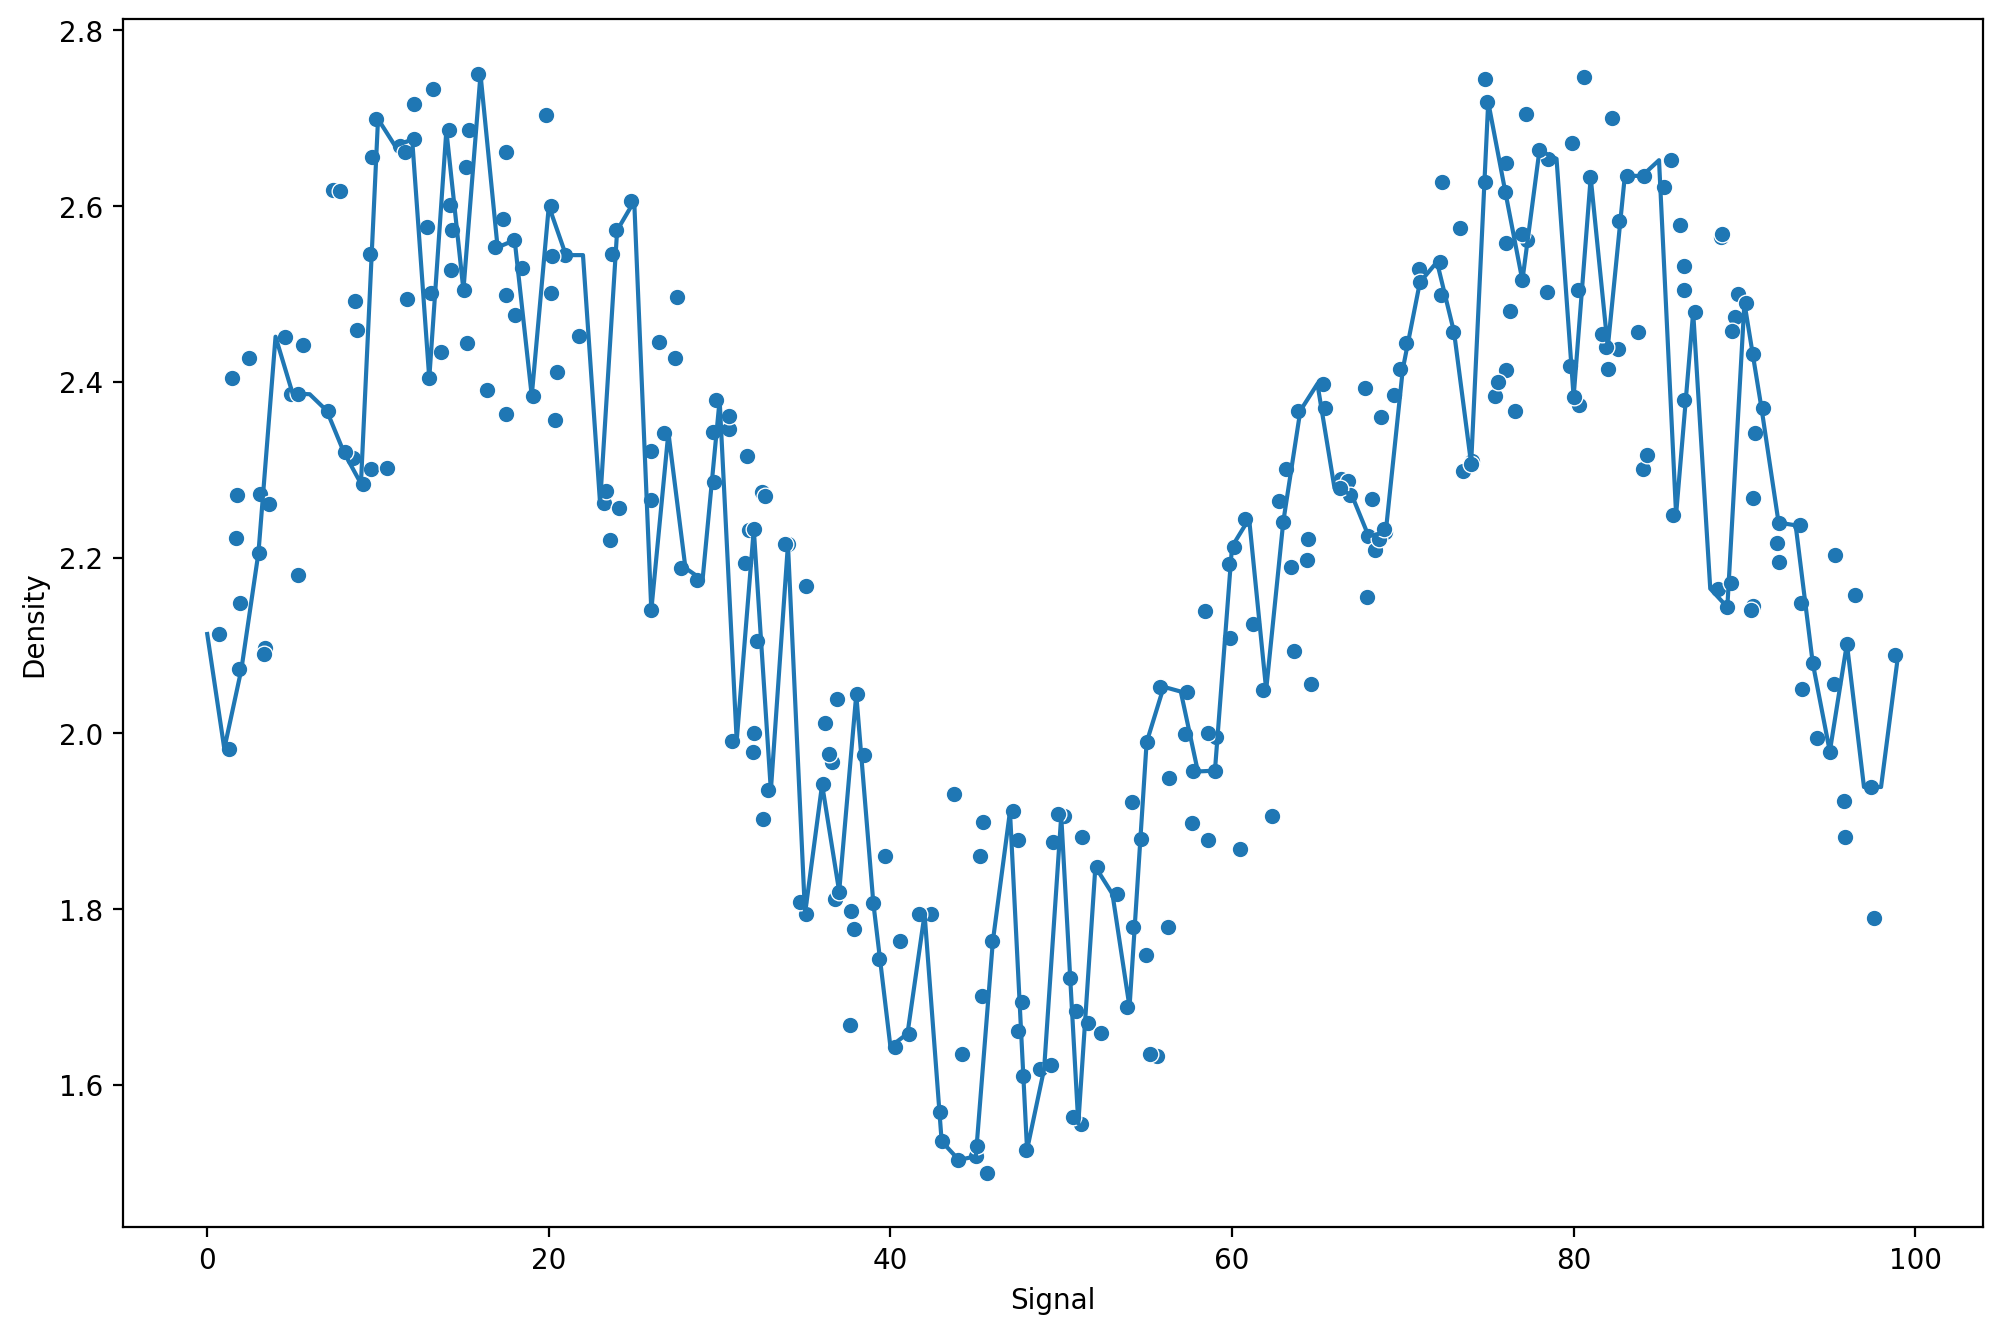

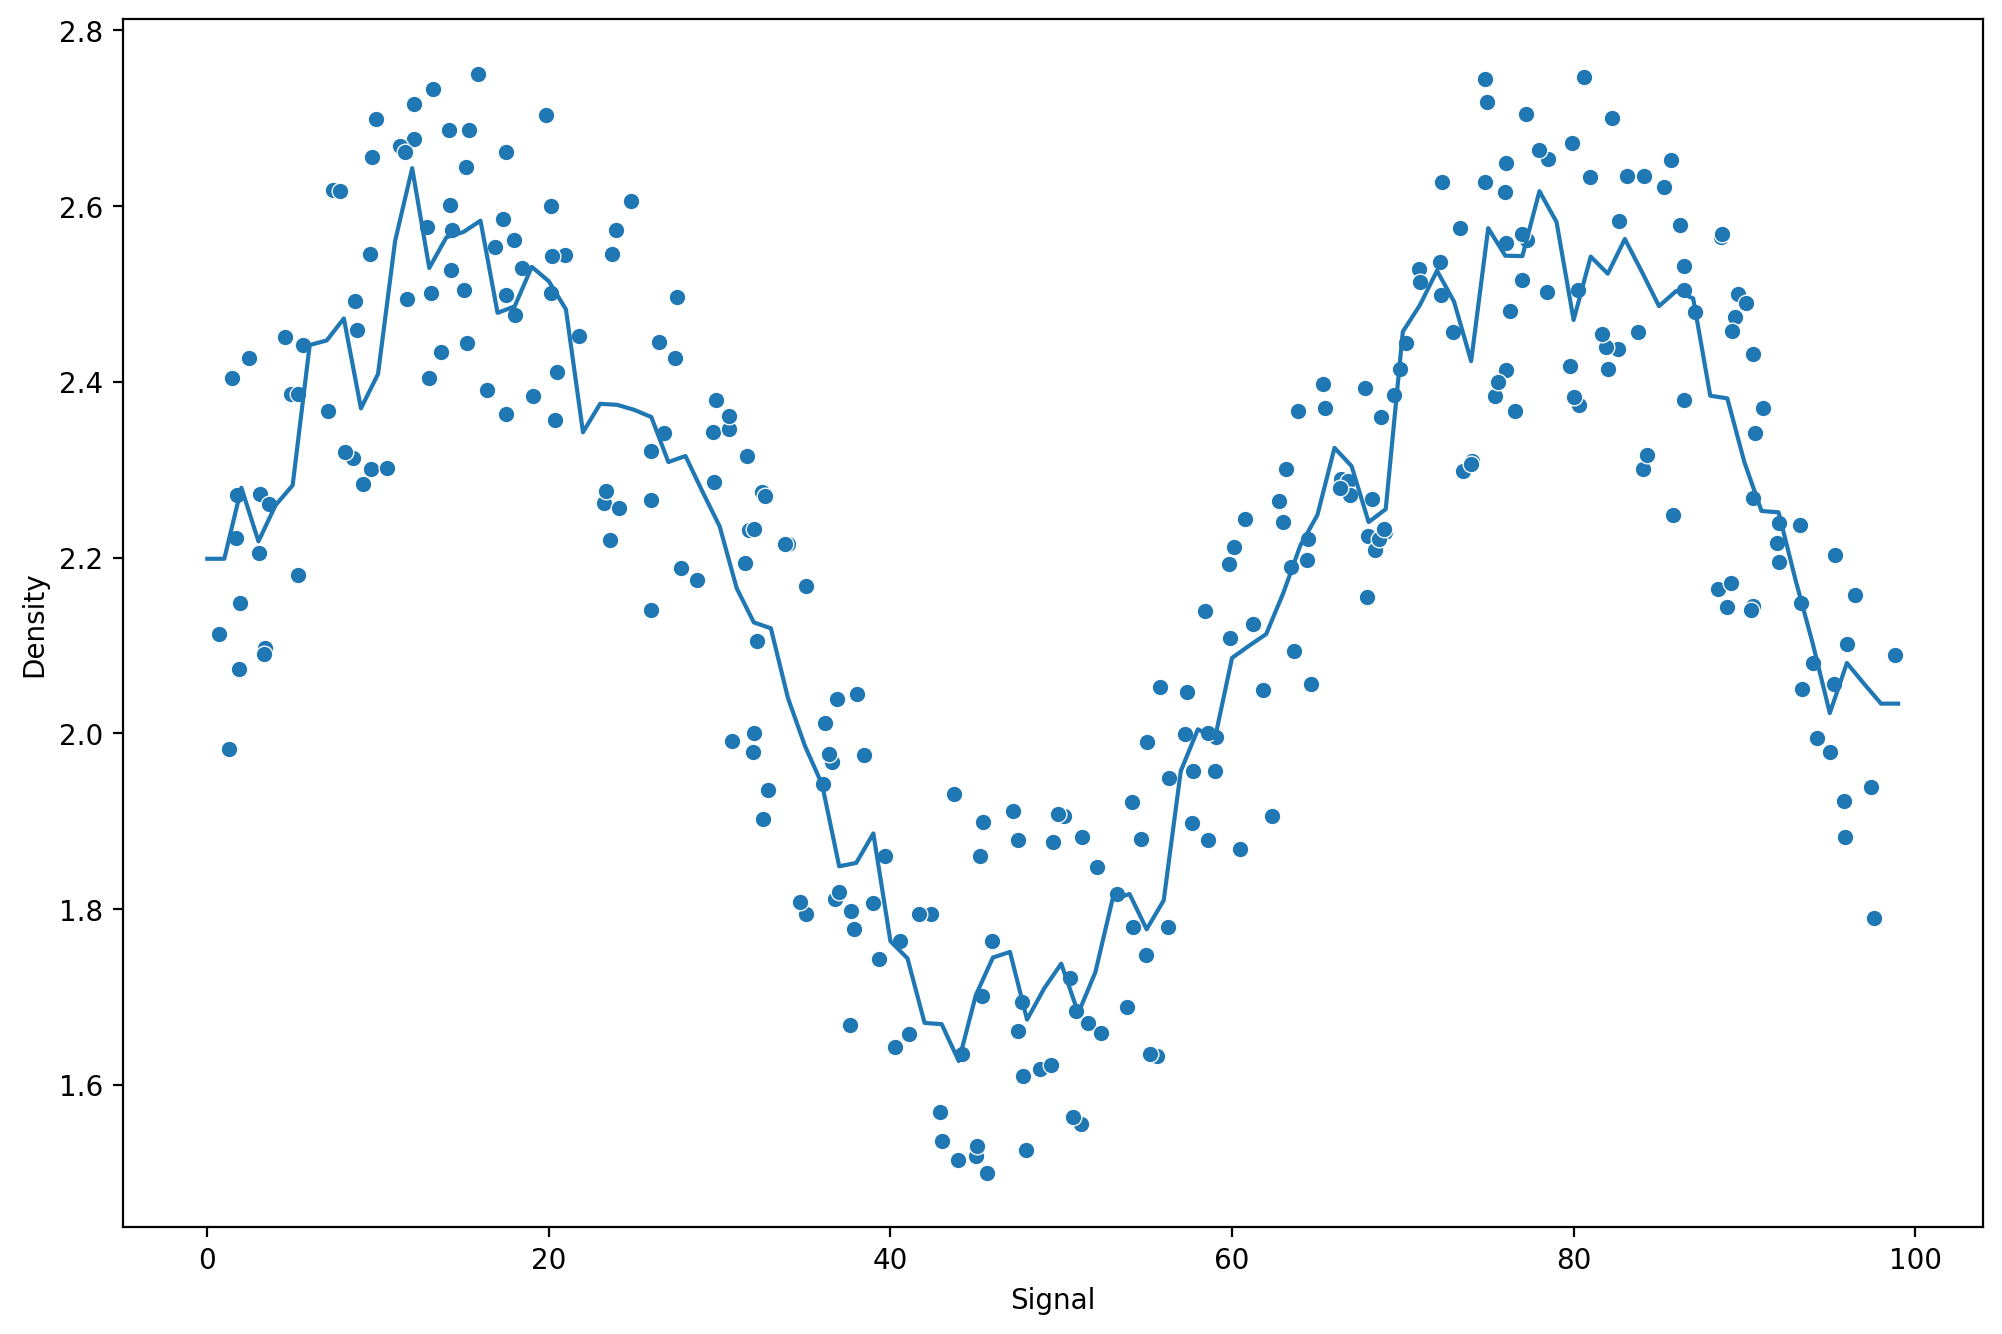

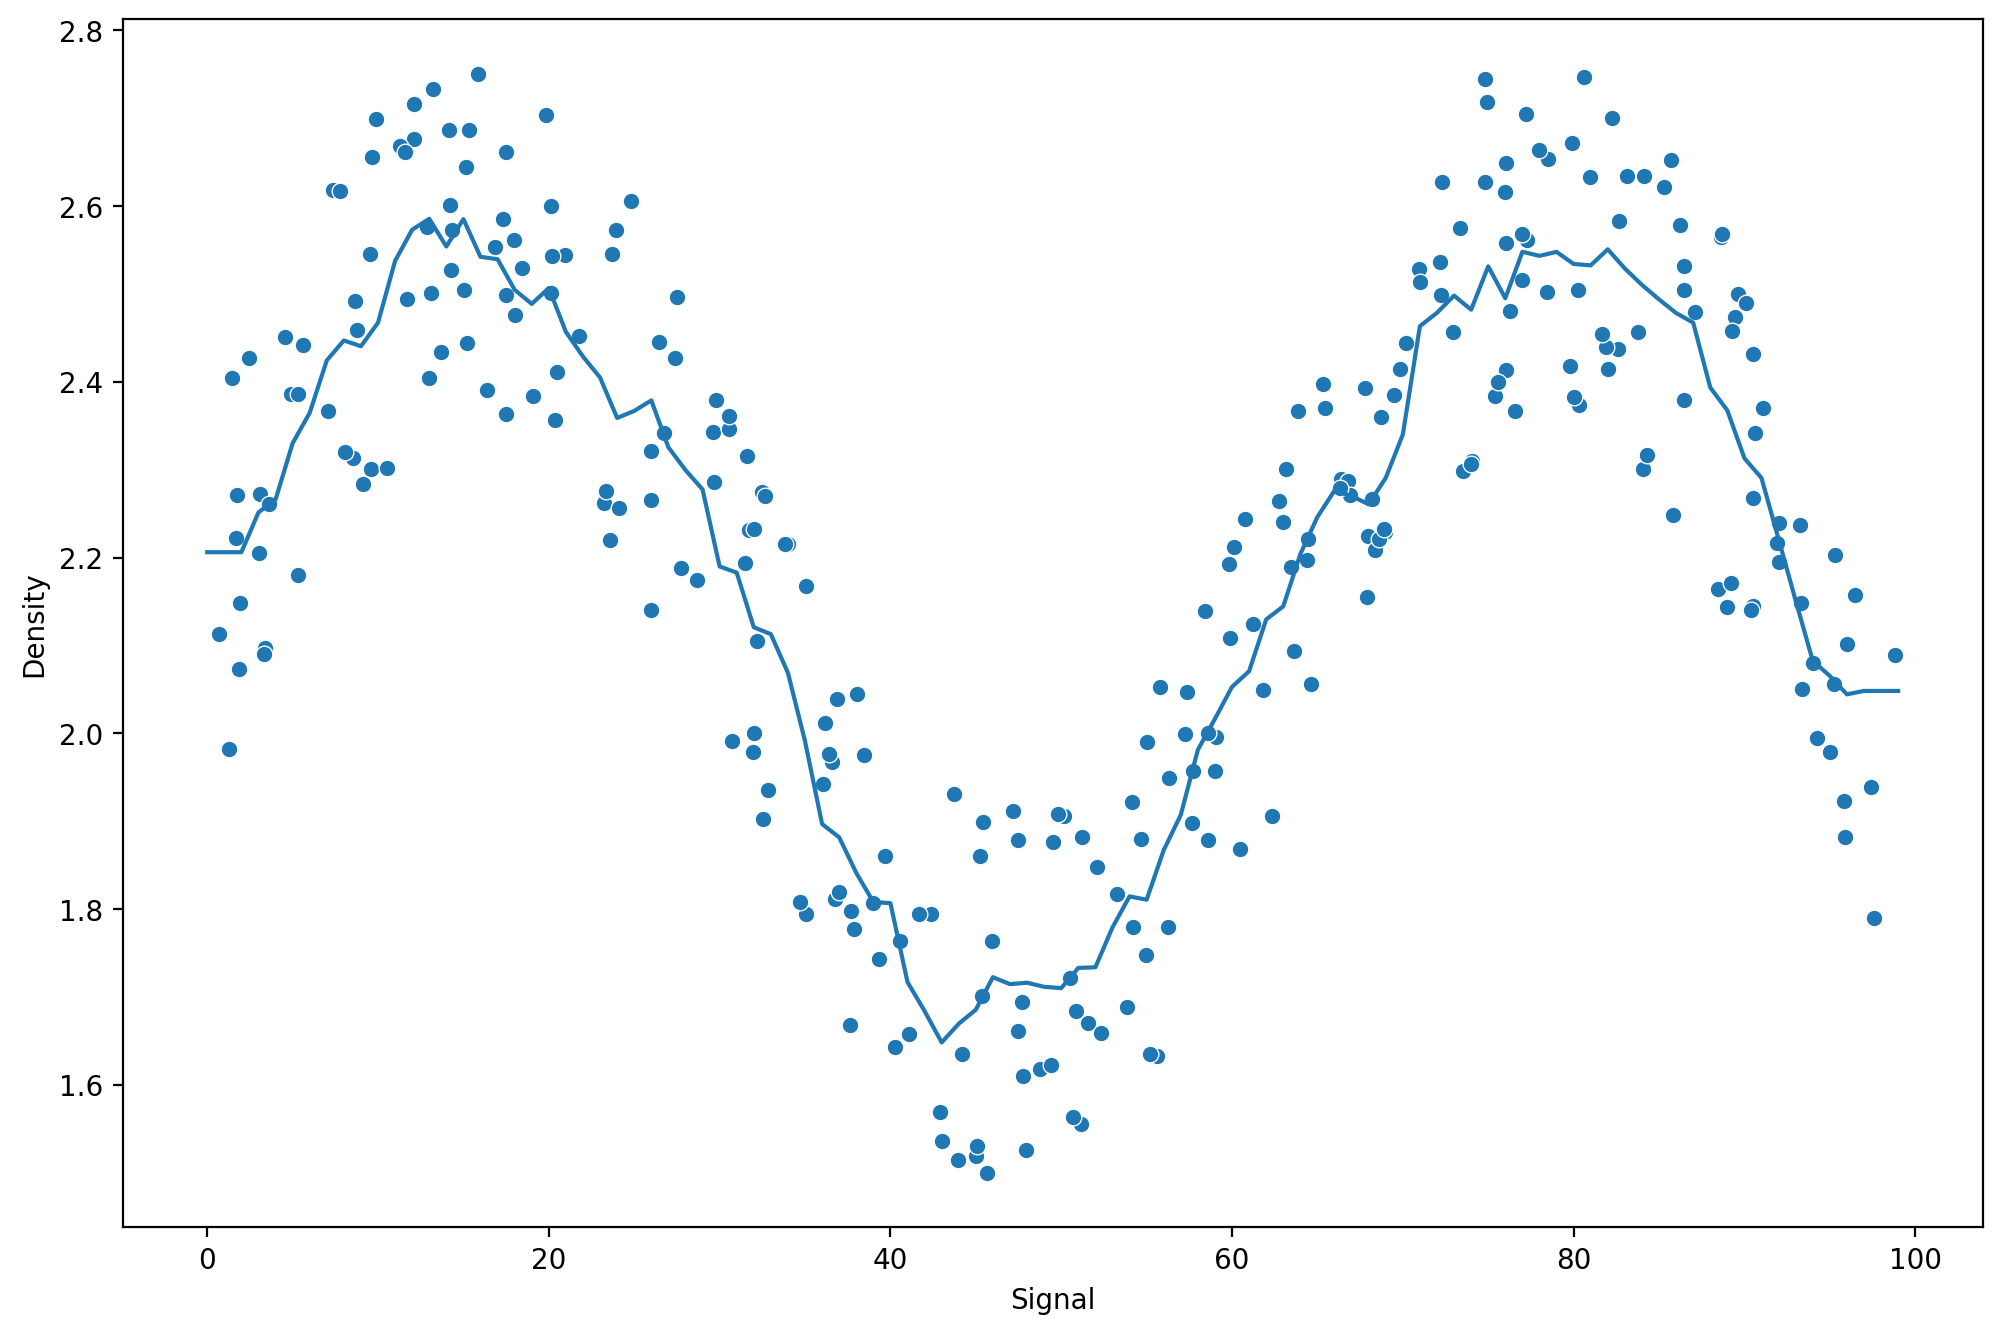

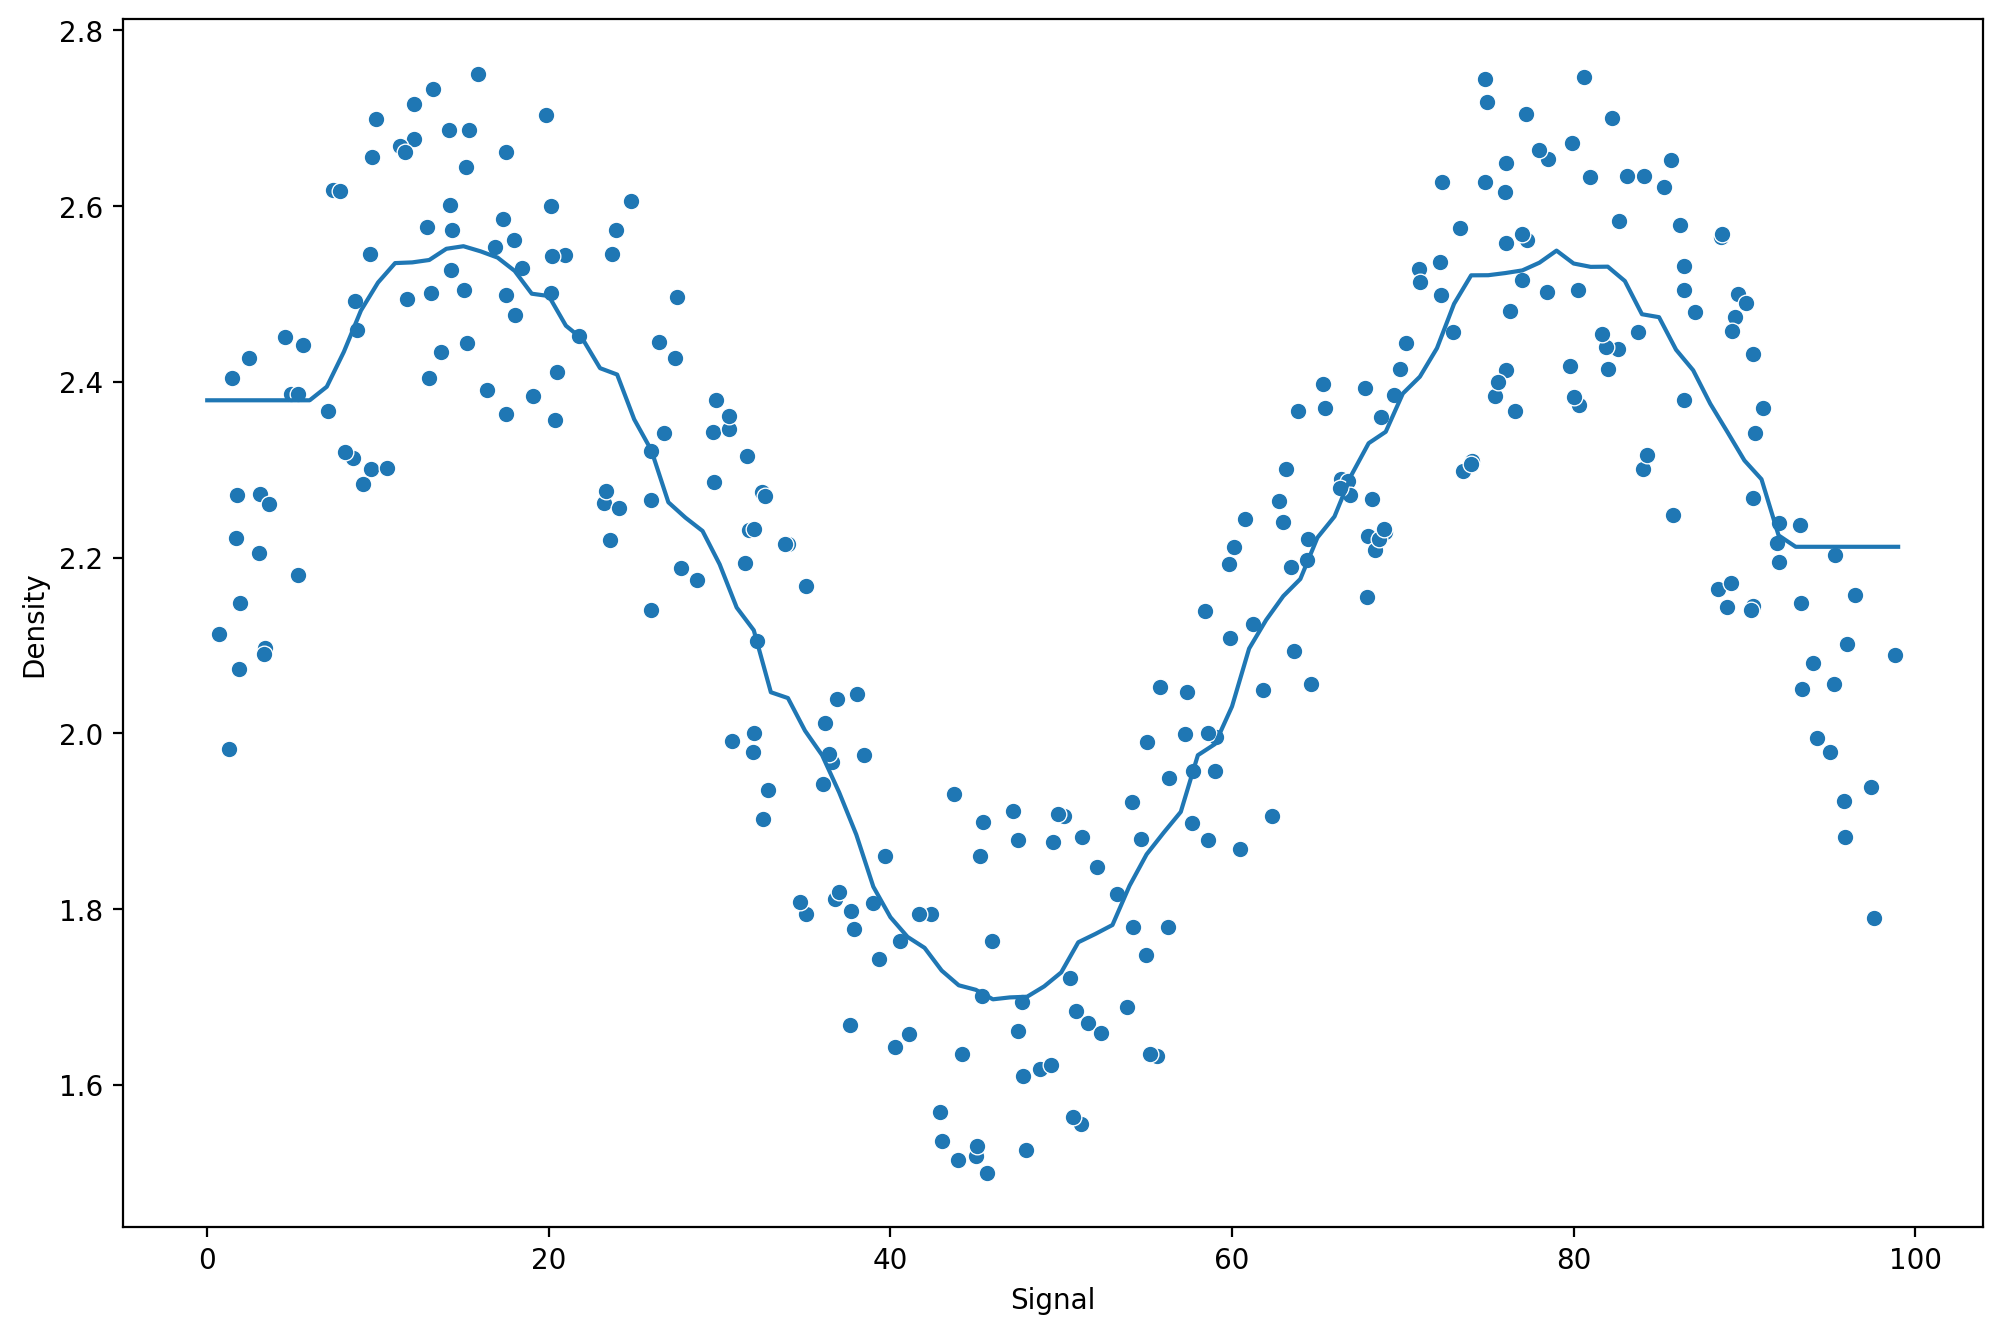

In [33]:
k_values=[1, 5, 10, 30]
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    
    run_model(model, X_train, y_train, X_test, y_test)

In [34]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442382
RMSE : 0.15234870286353372


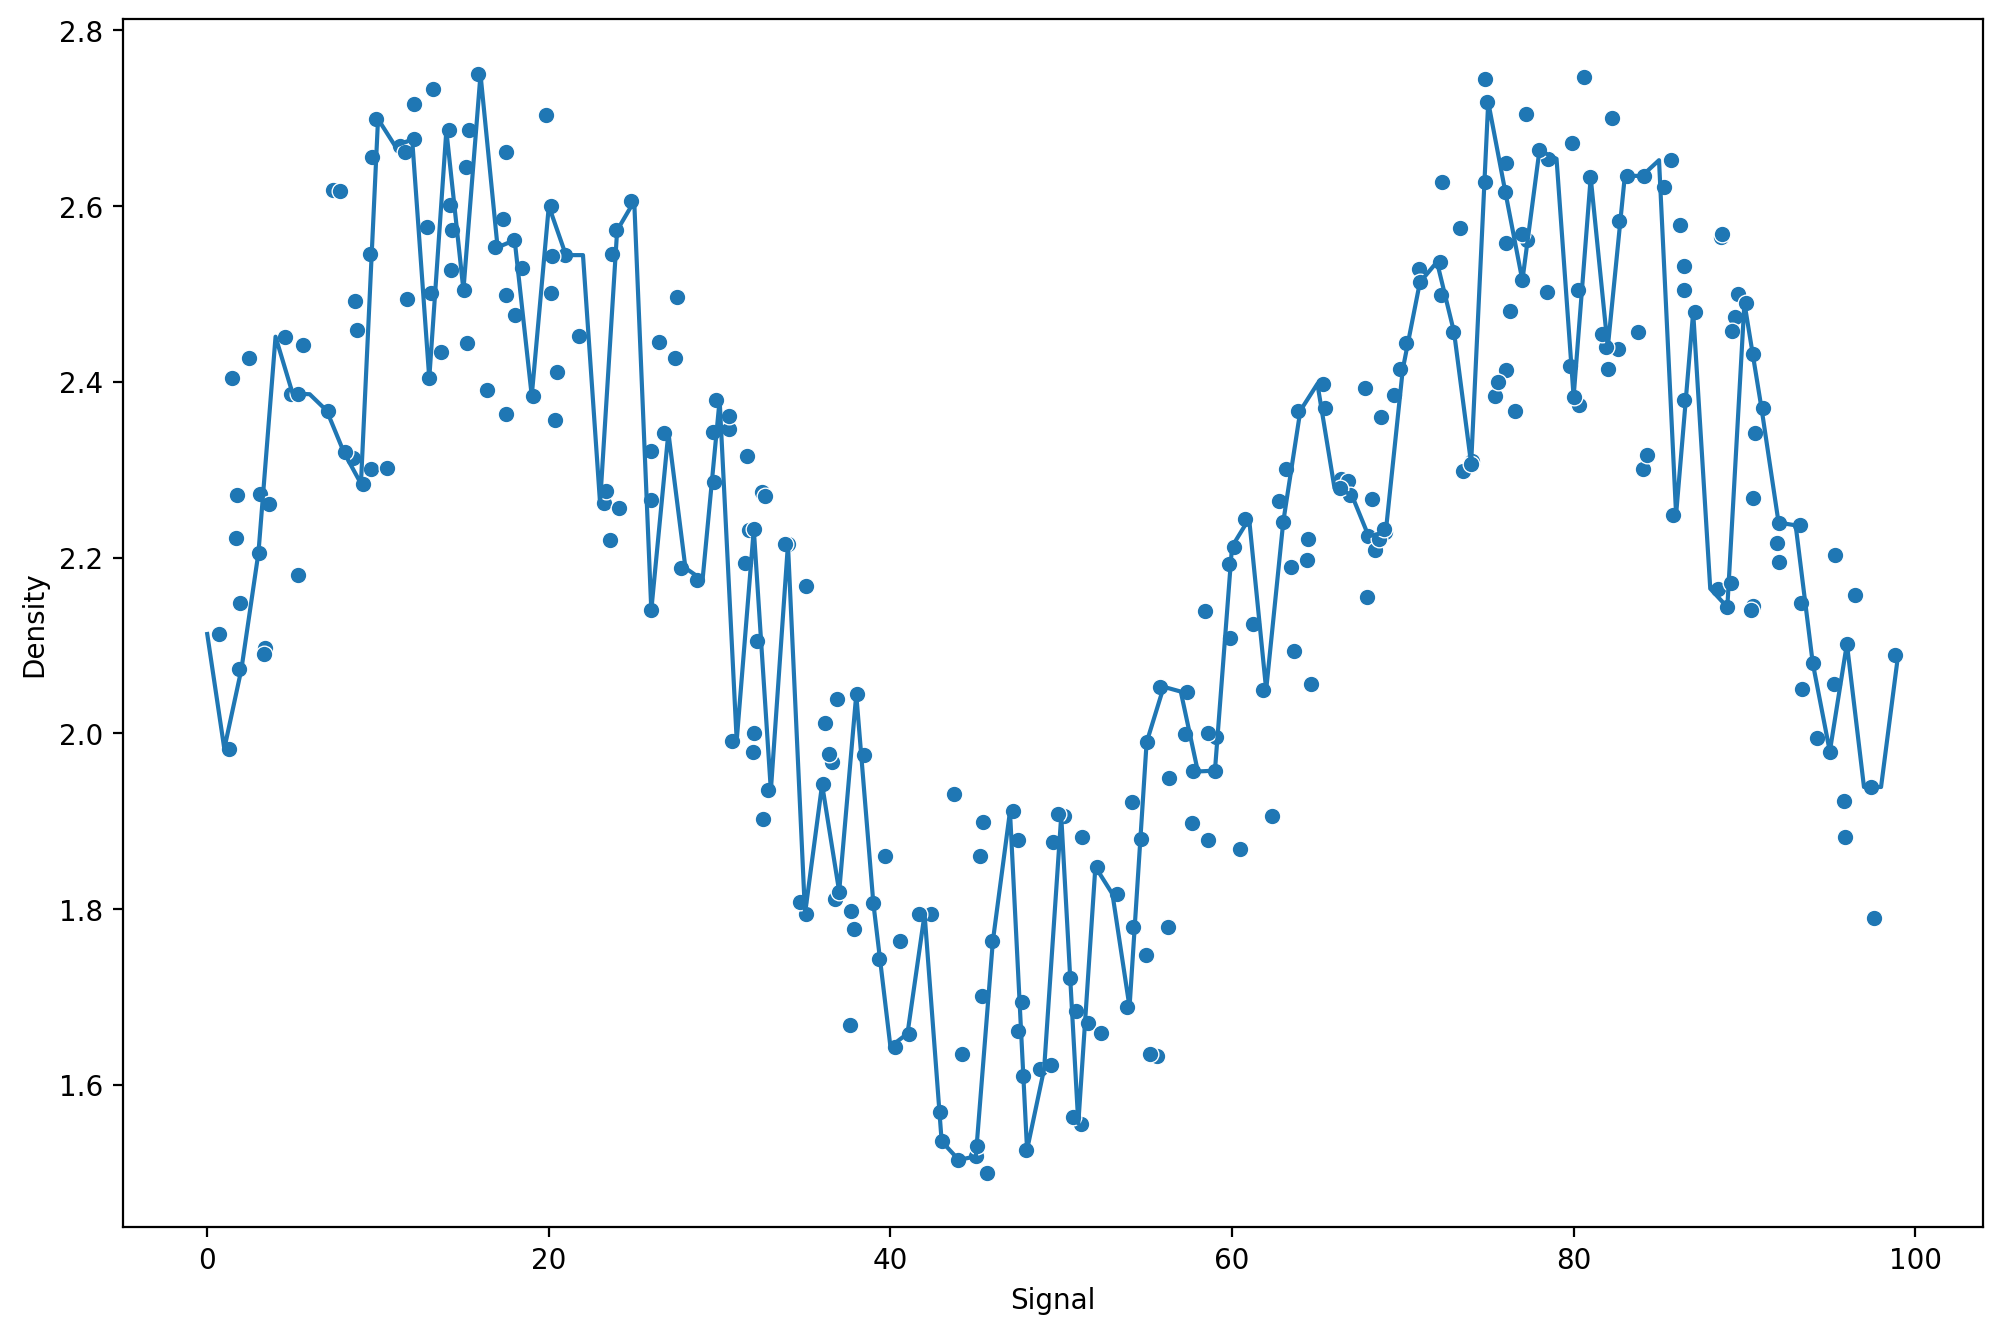

In [35]:
model=DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
svr=SVR()
param_grid={
    'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma':['auto', 'scale']
}

grid=GridSearchCV(
    estimator=svr,
    param_grid=param_grid
)

MAE : 0.10839253242165772
RMSE : 0.12634668775105407


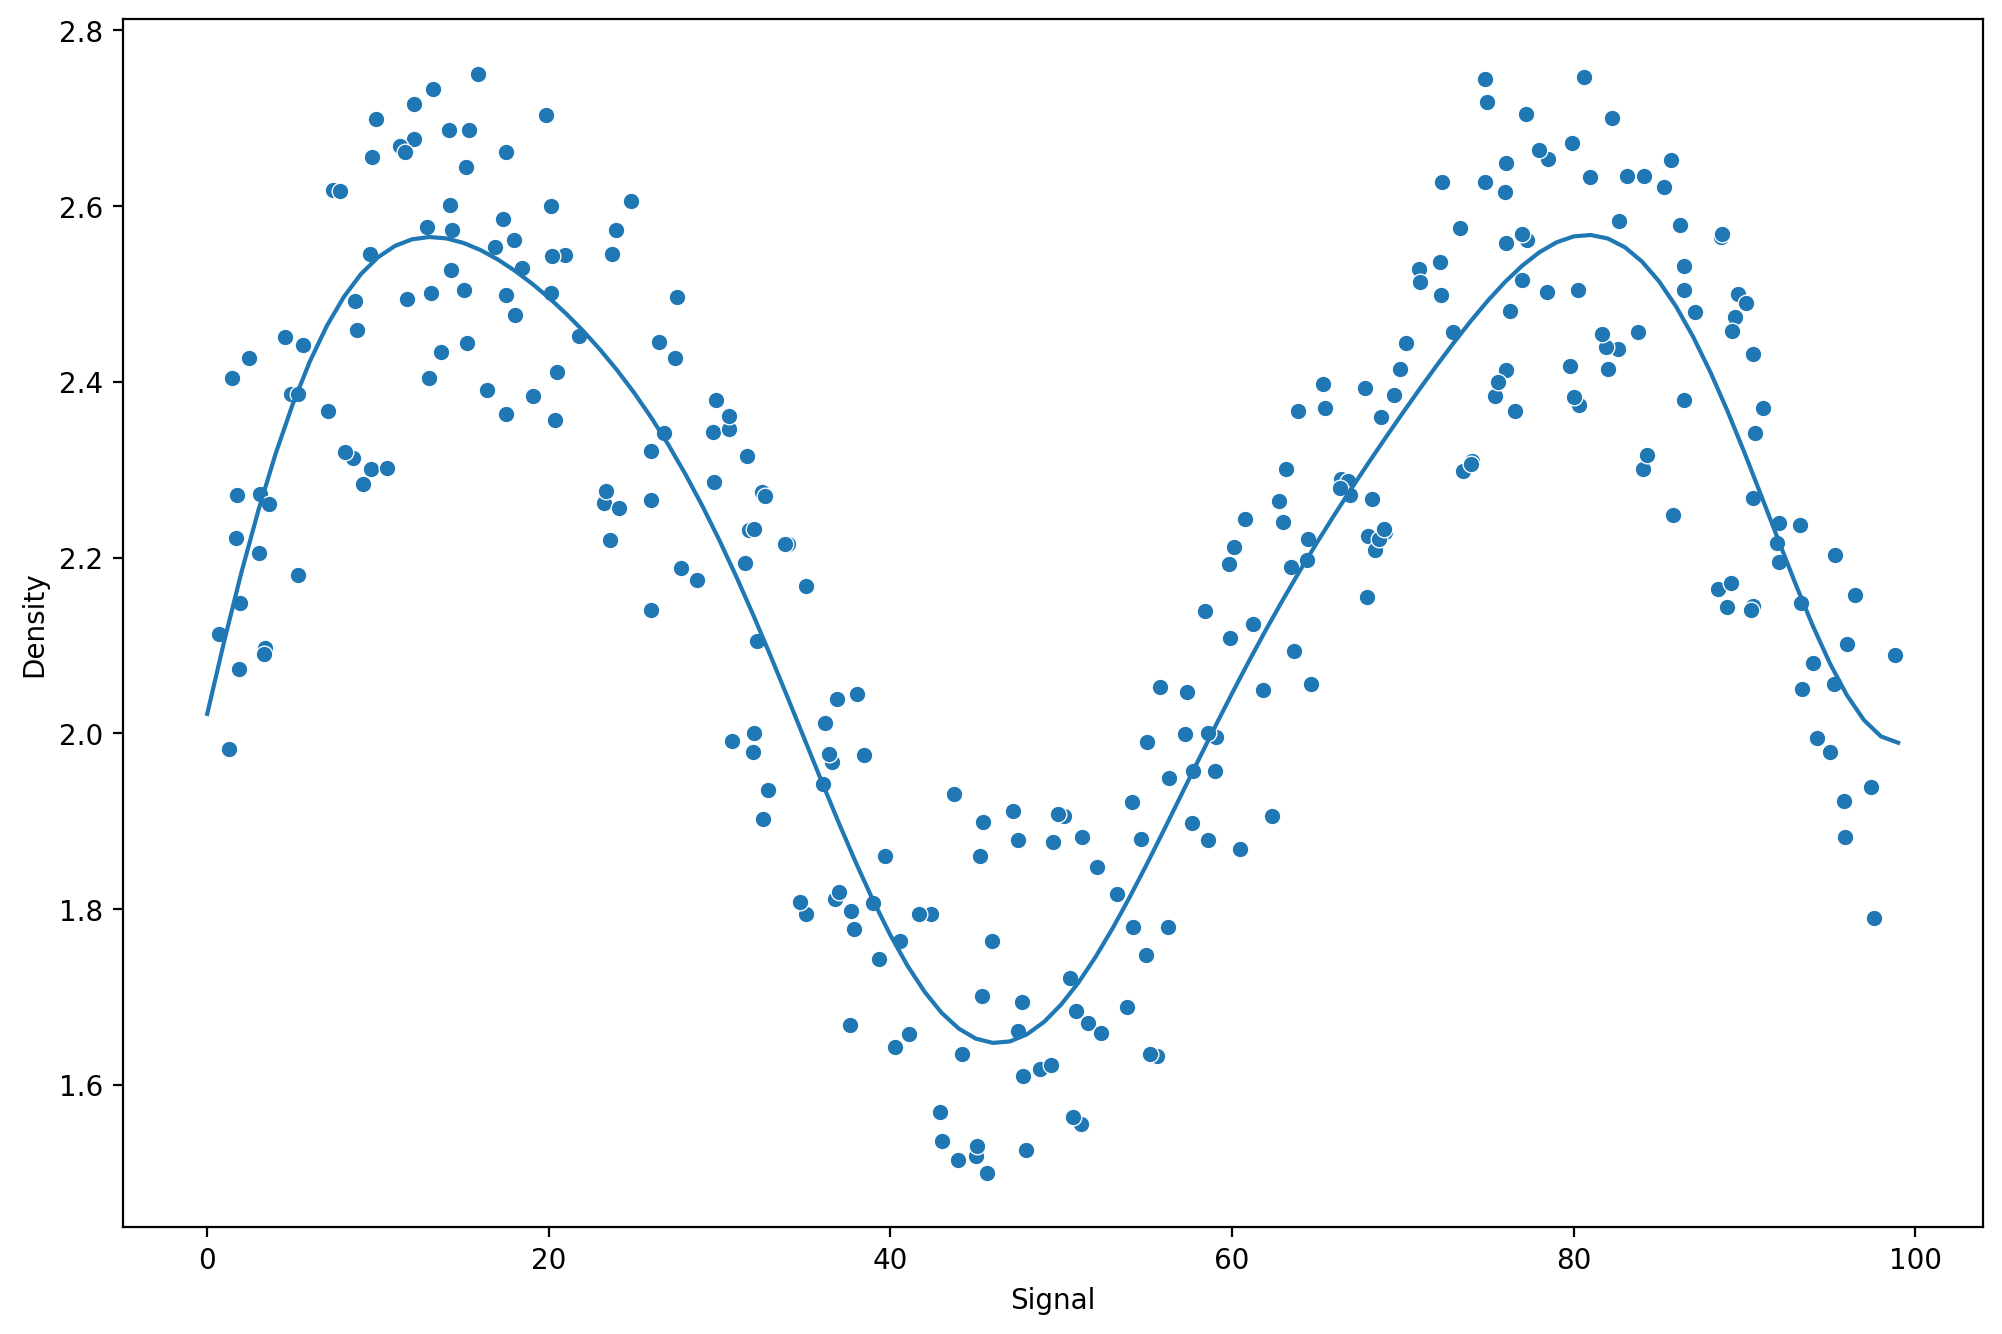

In [39]:
run_model(grid, X_train, y_train, X_test, y_test)

In [40]:
# Random Forest Regression.
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr=RandomForestRegressor(
    n_estimators=10
)

MAE : 0.11370197307666614
RMSE : 0.13551054927803793


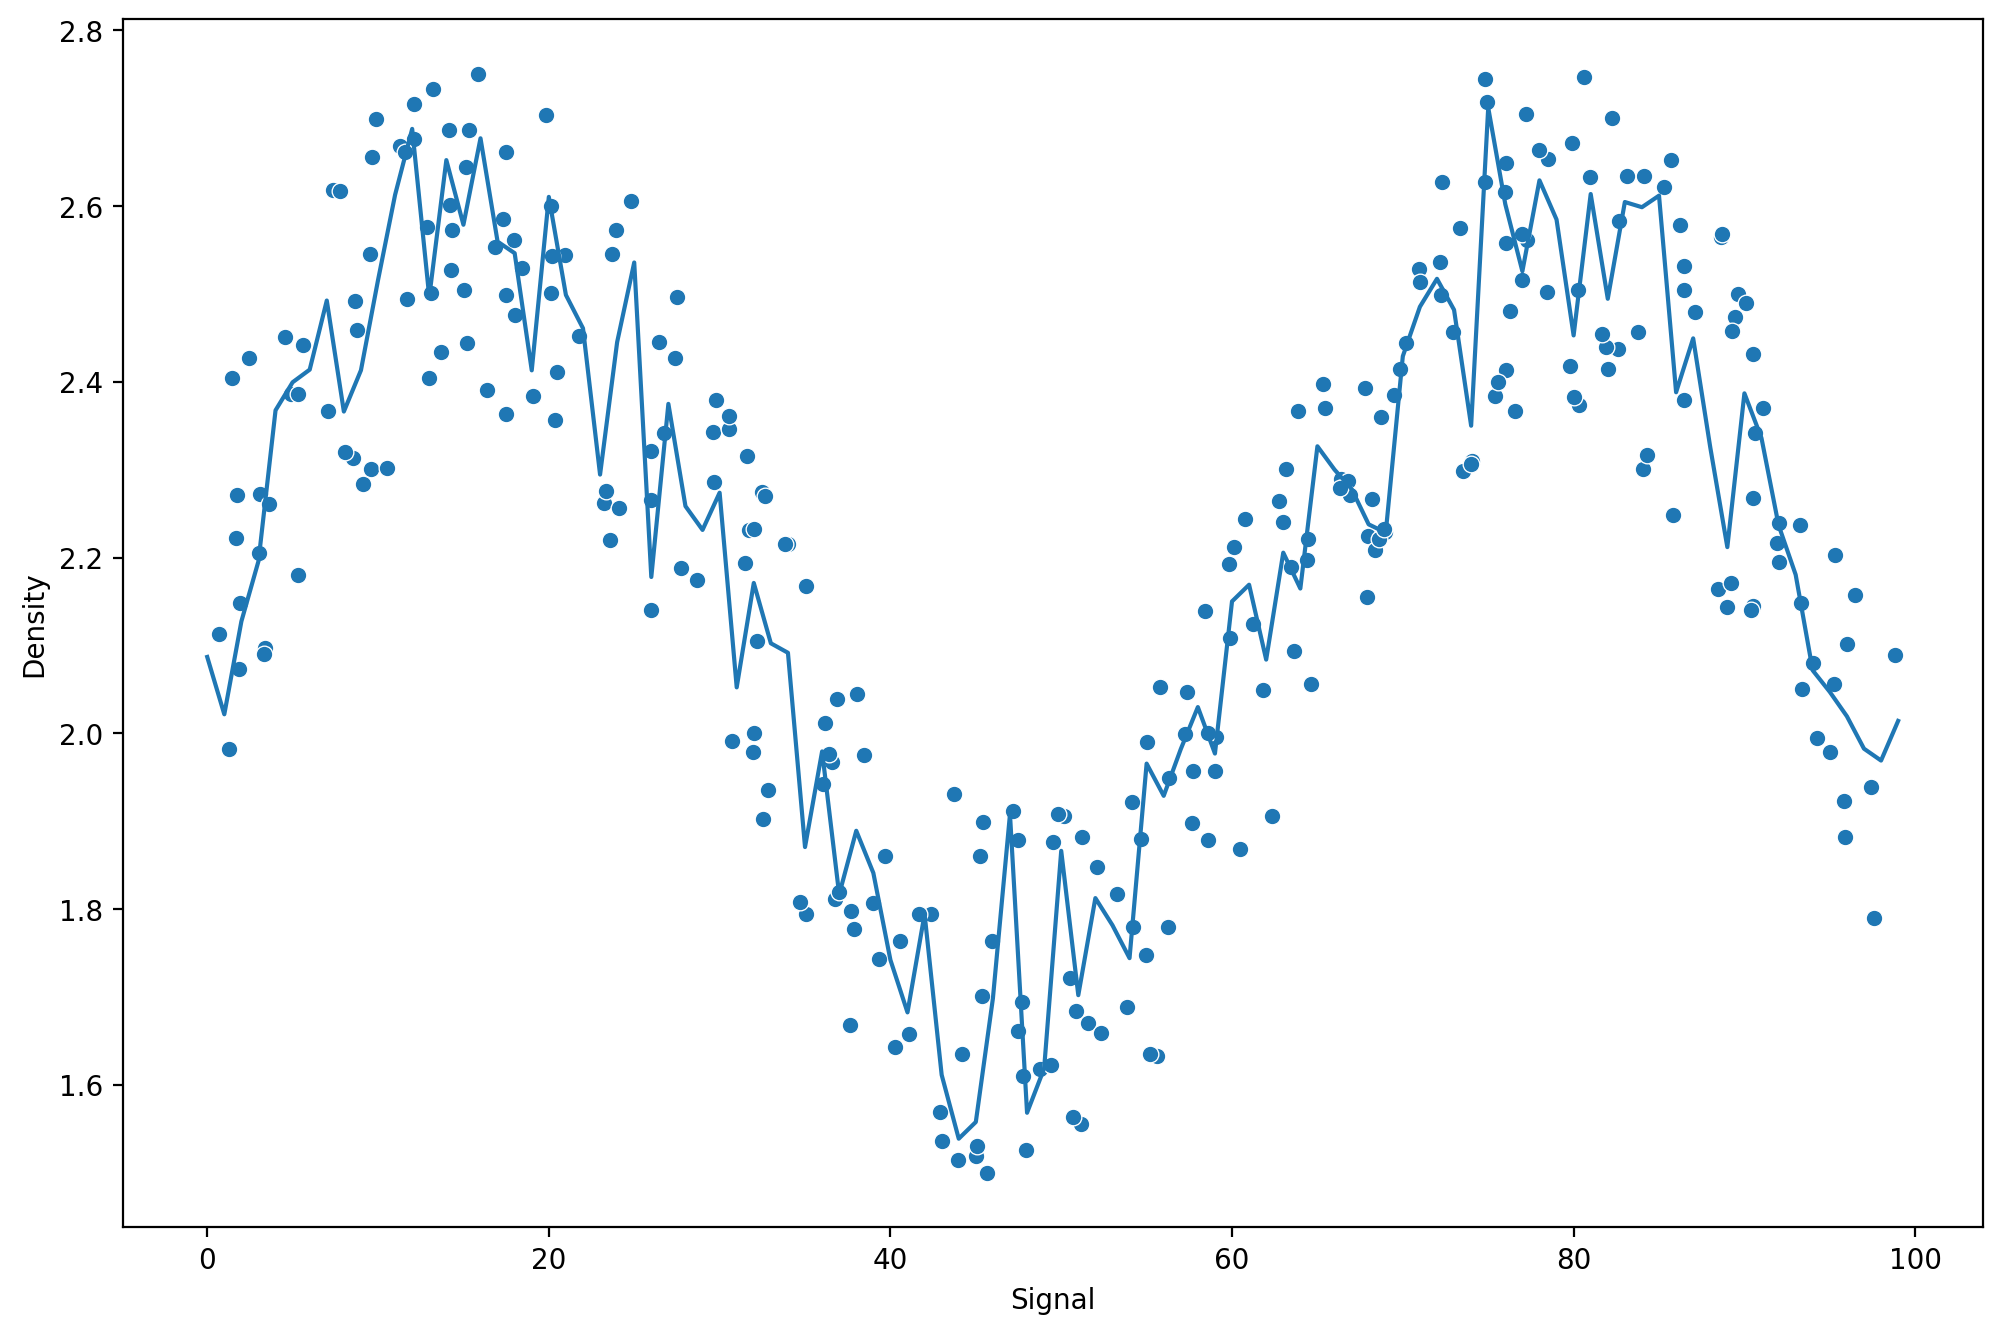

In [42]:
run_model(rfr, X_train, y_train, X_test, y_test)